# ITCR - Ciencias de Datos

## Aprendizaje Automático 

## Regresión paramétrica

Profesora: María Auxiliadora Mora

Autores: Saúl Calderón, Juan Esquivel, Luis-Alexander Calvo-Valverde, María Auxiliadora Mora

# Regresión Paramétrica
El objetivo de la regresión es predecir el valor de una o más variables continuas dado el valor de un vector D-dimensional $x$ de las variables de entrada.

## El problema de ajuste de curvas


El problema de ajuste de curvas se refiere a la **construcción de un modelo que permita predecir el comportamiento de un fenómeno a estudiar**.  Este fenómeno puede caracterizarse mediante una serie de valores en su entrada, con lo cual es posible medir su comportamiento a la salida del fenómeno. 
  
![](../imagenes/Curve_fitting.jpeg)

- Figura 1 (Wikipedia). Puntos de ajuste de curvas polinómicas generados con una función seno. La **línea punteada negra corresponde a los datos**, la **línea roja es un polinomio de primer grado**, la **línea verde es de segundo grado**, la **línea naranja es de tercer grado** y la **línea azul es de cuarto grado**.


**El objetivo del ajuste de curvas es encontrar un modelo que se ajuste al conjunto de observaciones $\mathcal{D}=\left\{ \vec{x},\vec{t}\right\} $, y que posibilite la predicción de de la salida $t$ para una nueva muestra $x$.**

Estudiaremos un **modelo con pesos lineales respecto al vector de pesos o parámetros del modelo $\vec{w}$** con funciones base polinomiales, de la forma:

\begin{equation}
y(x,\vec{w})=w_{0}+w_{1}x+w_{2}x^{2}+\ldots+w_{M}x^{M}=\sum_{j=0}^{M}w_{j}x^{j}
\end{equation}
  
por lo que $\vec{w}\in\mathbb{R}^{M+1}$, definiendo $M+1$ la dimensionalidad
del modelo, y constituyendo la cantidad de parámetros desconocidos
a estimar. Observe que la regresión lineal es un caso particular de
la regresión polinomial con $M=1$: 
  
\begin{equation}
y(x,\vec{w})=w_{0}+w_{1}x=\sum_{j=0}^{1}w_{j}x^{j}
\end{equation}

En general, si otras funciones base distintas a $\phi_{j}(x)=x^{j}$
son usadas, la expresión del modelo viene dada por: 
  
\begin{equation}
y(x,\vec{w})=\sum_{j=0}^{M}w_{j}\phi_{j}(x)
\end{equation}
  
\begin{equation}
\Rightarrow y(x,\vec{w})=\vec{w}\cdot\vec{\phi}(x)
\end{equation}
  
donde el conjunto de funcionales $\{\phi_{1}(x),\phi_{2}(x),\ldots,\phi_{M}(x)\}$
se le denomina conjunto base, o **conjunto de funciones base**.

En estos modelos, **el orden viene dado por la cantidad de términos
en la combinación lineal $M$, el cual define la complejidad del modelo**.
Una vez definido el modelo a implementar (lineal o no lineal, conjunto
de funciones base), **el problema general de ajuste de modelo al conjunto
de observaciones $\mathcal{D}=\left\{ \vec{x},\vec{t}\right\} $ se
reduce a determinar el valor de los pesos $\vec{w}$**. Un enfoque sencillo
para calcular los valores de $\vec{w}$ óptimos es el de **mínimos
cuadrados**, el cual propone la expresión de la función de error como
sigue:

\begin{equation}
E(\vec{w})=\frac{1}{2}\sum_{n=0}^{N}\left\{ y\left(x_{n},\vec{w}\right)-t_{n}\right\} ^{2}=\frac{1}{2}\sum_{n=1}^{N}\left\{ \sum_{j=0}^{M}w_{j}x_{n}^{j}-t_{n}\right\} ^{2}
\end{equation}

En tal esquema de mínimos cuadrados, el error se define entonces 
como la diferencia al cuadrado de la evaluación del modelo en cada
muestra de $\vec{x}=\left[x_{0},...,.x_{N}\right]^{T}$ con cada uno
de las muestras de su salida $\vec{t}=\left[t_{0},...,.t_{N}\right]^{T}$
usando entonces el conjunto de datos de entrenamiento $\mathcal{D}=\left\{ \vec{x},\vec{t}\right\} $.
  
  
Nótese que es posible **utilizar otras funciones de error** como,
por ejemplo, la diferencia absoluta. **El enfoque de mínimos cuadrados
propone minimizar la expresión de error propuesta en la ecuación anterior,
por cada uno de los pesos en el vector $\vec{w}$**. Para ello, dicha ecuación
es derivada parcialmente respecto a $w_{i}$ e igualada
a cero:

\begin{equation}
\frac{\partial E\left(\vec{w}\right)}{w_{i}}=\sum_{n=1}^{N}\left\{ \sum_{j=0}^{M}w_{j}x_{n}^{j}-t_{n}\right\} x_{n}^{i}=0
\end{equation}

Despejando entonces la expresión, se obtiene un conjunto de $M+1$ ecuaciones $(i=0,1,2,3,\ldots,M)$ donde los valores $w_{j}$ son desconocidos, por lo que para una ecuación $i$ tenemos:

\begin{equation}
\sum_{n=1}^{N}\sum_{j=0}^{M}w_{j}x_{n}^{j+i}=\sum_{n=0}^{N}t_{n}x_{n}^{i}
\end{equation}
y cambiando el orden a las sumatorias se obtiene:

\begin{equation}
\sum_{j=0}^{M}\sum_{n=1}^{N}w_{j}x_{n}^{j+i}=\sum_{n=0}^{N}t_{n}x_{n}^{i}
\end{equation}
 
Los valores $w_{j}$ obtenidos al resolver este sistema de ecuaciones
anterior se representan en el vector de pesos óptimo $\vec{w}_{\textrm{opt}}$. 

En términos matriciales, lo anterior se desarrolla como:
  
$
\begin{bmatrix}\sum_{n=1}^{N}1 & \sum_{n=1}^{N}x_{n} & \sum_{n=1}^{N}x_{n}^{2} & \ldots & \sum_{n=1}^{N}x_{n}^{M}\\
\sum_{n=1}^{N}x_{n} & \sum_{n=1}^{N}x_{n}^{2} & \sum_{n=1}^{N}x_{n}^{3} &  & \sum_{n=1}^{N}x_{n}^{M+1}\\
\sum_{n=1}^{N}x_{n}^{2} & \sum_{n=1}^{N}x_{n}^{3} & \sum_{n=1}^{N}x_{n}^{4} &  & \sum_{n=1}^{N}x_{n}^{M+2}\\
 &  & \vdots\\
\sum_{n=1}^{N}x_{n}^{M} & \sum_{n=1}^{N}x_{n}^{M+1} & \sum_{n=1}^{N}x_{n}^{M+2} &  & \sum_{n=1}^{N}x_{n}^{2M}
\end{bmatrix}\:\vec{w}=\begin{bmatrix}\sum_{n=1}^{N}t_{n}\\
\sum_{n=1}^{N}x_{n}t_{n}\\
\sum_{n=1}^{N}x_{n}^{2}t_{n}\\
\vdots\\
\sum_{n=1}^{N}x_{n}^{M}t_{n}
\end{bmatrix}
$
  
Para lo cual, si $A$ es la primer matriz de izquierda a derecha,
y $B$ la matriz al lado derecho de la igualdad, se tiene que:
  
$$
\vec{w}_{\textrm{opt}}=A^{-1}\:B
$$

Para evaluar el error resultante de ajustar un modelo de dimensión
$M$ y con pesos $\vec{w}_{\textrm{opt}}$, se utiliza el error normalizado
o **error RMS (raíz del error cuadrático medioa)**, expresado como sigue:

\begin{equation}
E\left(\vec{w}_{\textrm{opt}}\right)_{\textrm{RMS}}=\sqrt{2E\left(\vec{w}_{\textrm{opt}}\right)/N}.
\end{equation}

Un modelo más complejo, es decir, con una dimensionalidad $M$ más
alta, minimiza el error frente al conjunto de datos de *entrenamiento*
$\vec{t}$, como la siguiente Figura muestra el ajuste de la curva con distintos $M$. 


![](../imagenes/multiplesm.png)

El ajuste a los datos depende la cantidad de parámetros $M$ y la cantidad de datos $N$, como además lo muestra la Figura anterior, puesto que una cantidad de parámetros alta frente una cantidad de muestras baja, producirá un mayor sobreajuste.


![](../imagenes/overfitting.png)


La Figura anterior, muestra además que **de sobre-ajustarse
a una gran cantidad de datos con sesgos o ruido, el modelo no realizará
una estimación adecuada ante nuevos datos**. Es por ello que es recomendable
**no sobre-ajustar el modelo a los datos**, escogiendo una cantidad
de parámetros $M$ apropiada. Para eliminar la relación entre la cantidad
de datos y la cantidad de parámetros, se utilizan **modelos
regularizados**.

En resumen: 
- La regresión polinomial es una forma de análisis de regresión en la que la relación entre las variables independientes y las variables dependientes se modelan por medio de un polinomio de grado n.

- Los modelos de regresión polinomial generalmente se ajustan con el método de mínimos cuadrados.

- El comportamiento de una variable dependiente puede explicarse por una relación aditiva lineal, o curvilínea, entre la variable dependiente y un conjunto de k variables independientes (xi, i=1 a k).

- La relación entre la variable dependiente y cualquier variable independiente es lineal o curvilínea (específicamente polinomial).

- Las variables independientes son independientes entre sí.

- A medida que se aumenta el grado del polinomio, tiende a aumentar el rendimiento del modelo. Sin embargo, aumentar los grados del modelo también aumenta el riesgo de sobreajuste o ajuste insuficiente de los datos.


In [1]:
## Ejemplo
## bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Text(0, 0.5, 'Y')

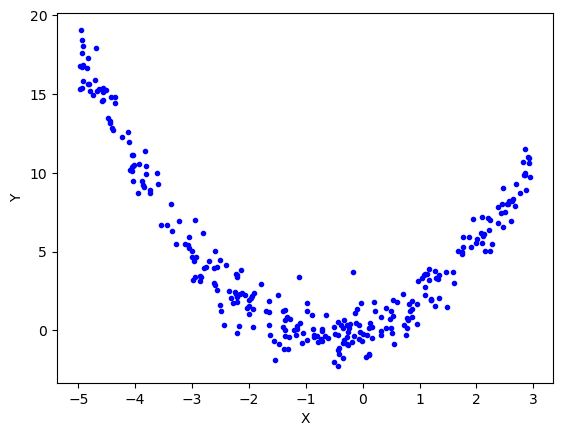

In [2]:
# Crear los datos con un error gausiano
 
X = 8 * np.random.rand(300, 1) - 5
y = 0.9 * X**2 + 0.97*X + np.random.randn(300, 1) 


# Graficar los datos
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")

### El coeficiente de determinación $R²$

Este coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. **$R²$ representa la proporción de la variación en la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s)**.

El valor de $R²$ varía de 0 a 1, donde 0 significa que no hay relación entre las variables y 1 significa una relación del 100%.

In [3]:
# train_test_split, particiona los datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Se realiza la regresión lineal
lr = LinearRegression()
lr.fit(x_train, y_train)

# Se realiza una predicción según la regresión realizada
y_pred = lr.predict(x_test)

# se comparan las aproximaciones por medio de un error.
# Calculando la proporción de variación de la variable dependiente 
# que es predecible a partir de la(s) variable(s) independiente(s)
print("R2 en regresión lineal", r2_score(y_test, y_pred))


R2 en regresión lineal 0.2700751113032742


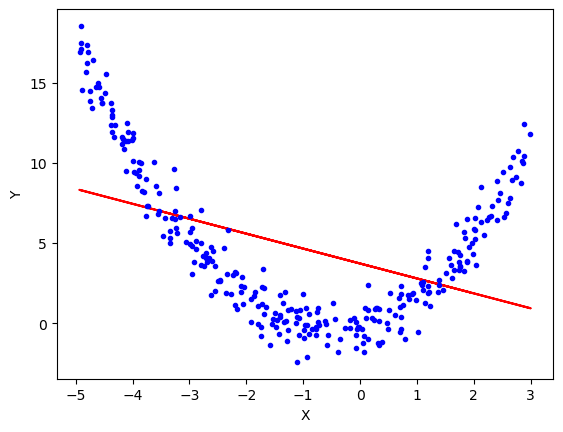

In [4]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [8]:
# Regresión polinomial 

# regresión polinomial para polinomio grado bajo
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X)

# aplicación de la regresión
lr = LinearRegression()
lr.fit(x_train_trans, y)

# resultados de la aproximación
y_pred = lr.predict(x_train_trans)
print("R2 regresión polinomial", r2_score(y, y_pred))


R2 regresión polinomial 0.9633721400817279


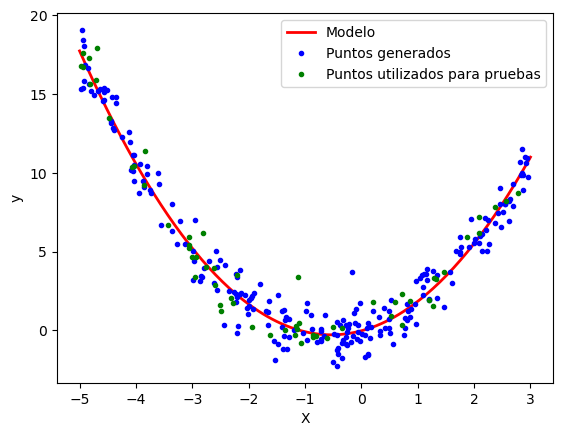

In [9]:
# definición de los puntos de predicción
X_new = np.linspace(-5, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# graficación de los datos
plt.plot(X_new, y_new, "r-", linewidth=2, label="Modelo")
plt.plot(x_train, y_train, "b.",label='Puntos generados')
plt.plot(x_test, y_test, "g.",label='Puntos utilizados para pruebas')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Modelo con sobreajuste 

Observe como R2 tiende a bajar al evaluarse el modelo en los datos de prueba.


R2 regresión polinomial 0.9494194329180285


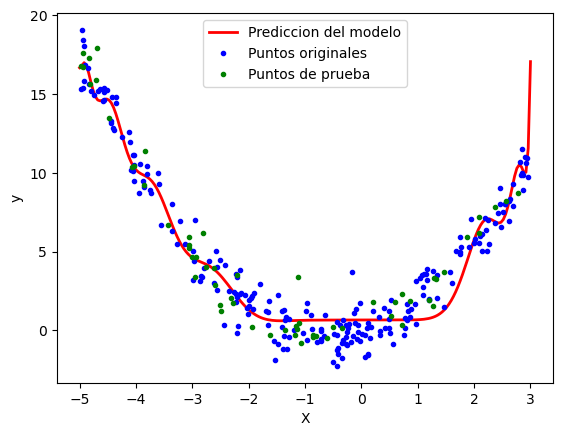

In [10]:
# Modelo con sobreajuste, observe el R2 que tiende a bajar en los datos de prueba.

# regresión polinomial para polinomio grado mayor
poly = PolynomialFeatures(degree=25, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

# aplicación de la regresión
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

# resultados de la aproximación
y_pred = lr.predict(x_test_trans)
print("R2 regresión polinomial", r2_score(y_test, y_pred))

# definición de los puntos de predicción
X_new = np.linspace(-5, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# graficación de los datos
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediccion del modelo")
plt.plot(x_train, y_train, "b.",label='Puntos originales')
plt.plot(x_test, y_test, "g.",label='Puntos de prueba')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Mínimos cuadrados regularizado

El método de mínimos cuadrados regularizado es una forma de resolver problemas de regresión con mínimos cuadrados con una restricción adicional en la solución (la regularización). **La regularización fomenta modelos más simples que tienen valores de coeficiente más pequeños por medio de añadir un término de penalización al error y evitando así el sobreajuste del modelo**.

La expresión de error regularizada agrega un término $\frac{\lambda}{2}\left\Vert \vec{w}\right\Vert _{2}^{2}$
con magnitud $\ell=2$, para controlar la magnitud del vector de pesos
$\vec{w}$ y su dimensionalidad, de forma más simple:

\begin{equation}
E(\vec{w})=\frac{1}{2}\sum_{n=1}^{N}\left\{ y\left(x_{n},\vec{w}\right)-t_{n}\right\} ^{2}+\frac{\lambda}{2}\left\Vert \vec{w}\right\Vert ^{2}
\end{equation}

\begin{equation}
E(\vec{w})=\frac{1}{2}\sum_{n=1}^{N}\left\{ \sum_{j=0}^{M}w_{j}x_{n}^{j}-t_{n}\right\} ^{2}+\frac{\lambda}{2}\left\Vert \vec{w}\right\Vert ^{2}
\end{equation}

En términos matriciales $E(\vec{w})$, se define

\begin{equation}
X=\begin{bmatrix}1 & x_{1} & x_{1}^{2} & x_{1}^{3} & \ldots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3} & \ldots & x_{2}^{M}\\
1 & x_{3} & x_{3}^{2} & x_{3}^{3} & \cdots & x_{3}^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & x_{N}^{3} & \ldots & x_{N}^{M}
\end{bmatrix},
\end{equation}


para el caso del modelo polinomial, por lo que $X$ es de dimensiones
$\mathbb{R}^{N\times M}$, $\vec{t}$ de $\mathbb{R}^{N\times1}$
y $\vec{w}\in\mathbb{R}^{M\times1}$ . Recordando además que la norma
al cuadrado de un vector como $\left\Vert \vec{w}\right\Vert ^{2}=\vec{w}^{T}\,\vec{w}$.
Se puede reescribir matricialmente la salida del modelo definido en
la sección de ajuste de curvas como:

\begin{equation}
y(X,\vec{w})=X\,\vec{w}=\begin{bmatrix}1 & x_{1} & x_{1}^{2} & x_{1}^{3} & \ldots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3} & \ldots & x_{2}^{M}\\
1 & x_{3} & x_{3}^{2} & x_{3}^{3} & \cdots & x_{3}^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & x_{N}^{3} & \ldots & x_{N}^{M}
\end{bmatrix}\,\begin{bmatrix}w_{0}\\
w_{1}\\
\vdots\\
w_{M}
\end{bmatrix}=\begin{bmatrix}\sum_{m=0}^{M}w_{m}\:x_{1}^{m}\\
\sum_{m=0}^{M}w_{m}\:x_{2}^{m}\\
\sum_{m=0}^{M}w_{m}\:x_{3}^{m}\\
\vdots\\
\sum_{m=0}^{M}w_{m}\:x_{N}^{m}
\end{bmatrix},
\end{equation}

y la ecuación con regularización es reescrita en términos matriciales:

\begin{equation}
E\left(\vec{w}\right)=\frac{1}{2}\left\Vert X\,\vec{w}-\vec{t}\right\Vert ^{2}+\frac{\lambda}{2}\left\Vert \vec{w}\right\Vert ^{2}=\frac{1}{2}\left(X\,\vec{w}-\vec{t}\right)^{T}\left(X\,\vec{w}-\vec{t}\right)+\frac{\lambda}{2}\vec{w}^{T}\,\vec{w}
\end{equation}

\begin{equation}
\Rightarrow E\left(\vec{w}\right)=\frac{1}{2}\left(\vec{w}^{T}X^{T}-\vec{t}^{T}\right)\left(X\,\vec{w}-\vec{t}\right)+\frac{\lambda}{2}\vec{w}^{T}\,\vec{w}
\end{equation}

\begin{equation}
\Rightarrow E\left(\vec{w}\right)=\frac{1}{2}\vec{w}^{T}X^{T}X\,\vec{w}-\frac{1}{2}\vec{w}^{T}X^{T}\vec{t}-\frac{1}{2}\vec{t}^{T}X\,\vec{w}+\frac{1}{2}\vec{t}^{T}\,\vec{t}+\frac{\lambda}{2}\vec{w}^{T}\,\vec{w}
\end{equation}

Calculando el gradiente de $\vec{w}$ e igualando a cero, para encontrar
el mínimo error, para lo cual recordamos las reglas básicas del cálculo
matricial: 


  1) $\nabla_{\vec{x}}\left(\vec{x}^{T}\vec{x}\right)=2\,\vec{x}$
  2) $\nabla_{\vec{x}}\left(\left(A\,\vec{x}\right)^{T}\left(A\,\vec{x}\right)\right)=2\,A\,\vec{x}$
  3)  $\nabla_{\vec{x}}\left(\vec{b}^{T}\vec{x}\right)=\vec{b}$
  4)  $\nabla_{\vec{x}}\left(\vec{x}^{T}\vec{b}^{T}\right)=\nabla_{\vec{x}}\left(\vec{b}\,\vec{x}\right)^{T}=\vec{b}^{T}$
  5) $\nabla_{\vec{x}}\left(\vec{x}^{T}\,A\,\vec{x}\right)=2\,A\,\vec{x}$


la ecuación matricial se convierte en:

\begin{equation}
\nabla_{\vec{w}}\left(E\left(\vec{w}\right)\right)=0\Rightarrow\nabla_{\vec{w}}\left(\frac{1}{2}\vec{w}^{T}X^{T}X\,\vec{w}-\frac{1}{2}\vec{w}^{T}X^{T}\vec{t}-\frac{1}{2}\vec{t}^{T}X\,\vec{w}+\frac{\lambda}{2}\vec{w}^{T}\,\vec{w},\right)=0,
\end{equation}

Para evaluar el gradiente observe que:
- En el primer término se puede utilizar la regla 5)
- Para el segundo y el tercer término: 
Observe con atención los términos $\vec{w}^{T}\,X^{T}\vec{t}$ y $\vec{t}^{T}X\:\vec{w}$. El primer término corresponde a un producto de matrices con dimensiones $1\times n\,n\times m\,m\times1$ lo cual resulta en un escalar, al igual que el segundo término asociado al producto $1\times m\,m\times n\,n\times1$.

Esto quiere decir que al tomar la transpuesta del terecer término por ejemplo, el escalar sigue siendo el mismo, por lo que entonces el tercer término es igual a $\frac{1}{2}\vec{w}^{T}X^{T}\:\vec{t}$,

Con lo que podemos reescribir la ecuación como:

\begin{equation}
\nabla_{\vec{w}}\left(E\left(\vec{w}\right)\right)=0\Rightarrow\nabla_{\vec{w}}\left(\frac{1}{2}\vec{w}^{T}X^{T}X\,\vec{w}-\vec{w}^{T}X^{T}\vec{t}+\frac{\lambda}{2}\vec{w}^{T}\,\vec{w},\right)=0,
\end{equation}

Entonces el gradiente corresponde a (utilizando en el último término la regla 1):

\begin{equation}
\nabla_{\vec{w}}\left(E\left(\vec{w}\right)\right)=X^{T}X\,\vec{w}-X^{T}\vec{t}+\lambda\vec{w}=0,
\end{equation}


que equivale a:

\begin{equation}
\left(X^{T}X+\lambda I\right)\vec{w}=X^{T}\vec{t},
\end{equation}

para finalmente obtener la expresión de $\vec{w}$:
\begin{equation}
\vec{w}=\left(X^{T}X+\lambda I\right)^{-1}X^{T}\vec{t}.
\end{equation}


## Preprocesamiento de las muestras
Para evitar problemas de *castigos* en el término de regularización dependientes de la
escala de las muestras en las $N$ observaciones $\vec{x}=\left[x_{1},...,.x_{N}\right]^{T}$
, se recomienda normalizar las muestras respecto a la desviación estándar,
de modo que:

\begin{equation}
\tilde{x}_{i}=\frac{x_{i}}{\sqrt{\frac{1}{N-1}\sum_{j=0}^{^{N-1}}\left(x_{j}-\overline{x}\right)^{2}}}
\end{equation}

En estadística, usualmente el modelo se define de la siguiente forma:

\begin{equation}
y(x,\vec{w})=\beta+w_{1}x+w_{2}x^{2}+\ldots+w_{M}x^{M}=\sum_{j=1}^{M}w_{j}x^{j}+\beta
\end{equation}

donde $\beta$ se le llama el **sesgo** o ***bias***.

# Regresión multivariable y selección de características por el método empotrado

En la regresión multivariable, se define cada muestra como un vector
de $D$ dimensiones, componentes o características de forma que una
muestra $i$ está dada por $\vec{x}_{i}\in\mathbb{R}^{D}$. De esta
forma, la salida del modelo $y$ viene dada por:

\begin{equation}
y\left(\vec{x},W\right)=\sum_{i=0}^{D-1}\sum_{j=0}^{M}x_{i}^{j}W_{i,j}=\sum_{i=0}^{D-1}\sum_{j=1}^{M}x_{i}^{j}W_{i,j}+\beta
\end{equation}

donde  los pesos a estimar pasan a estar representados en
la matriz $W\in\mathbb{R}^{D\times M}$ , y se le asigna entonces
un peso distinto a cada dimensión y a cada componente del polinomio
de grado $M$. Observe como entonces el aumentar la dimensionalidad
$D$ de cada muestra, aumenta la cantidad de parámetros a estimar,
y aumenta por ende el riesgo de sobreajuste, lo cual se corresponde
con la **maldición de la dimensionalidad**.

**Observe que por ejemplo**, si se desea implementar un modelo lineal
($M=1$) para una muestra de $D=3$, en este caso, la expresión desarrollada
del modelo viene dada por:

\begin{equation}
y\left(\vec{x},W\right)=\sum_{i=0}^{2}\sum_{j=0}^{1}x_{i}^{j}W_{i,j}=W_{0,0}+x_{0}W_{0,1}+W_{1,0}+x_{1}W_{1,1}+W_{2,0}+x_{2}W_{2,1}=\beta+x_{0}W_{0,1}+x_{1}W_{1,1}+x_{2}W_{2,1}
\end{equation}

con el sesgo definido por $\beta=W_{0,0}+W_{1,0}+W_{2,0}$, con lo
que la cantidad total de parámetros a estimar viene dada por $D\times M+1$. 

Para la **selección de características** o dimensiones más importantes,
es usual utilizar modelos sencillos y evaluar su error en un conjunto
de datos. Por ejemplo se puede seleccionar para muestras $\vec{x}_{i}\in\mathbb{R}^{D}$
la búsqueda de los parámetros de un modelo de orden $M=1$, con lo
que entonces el modelo se define como:

\begin{equation}
y\left(\vec{x},W\right)=\sum_{i=0}^{D-1}x_{i}W_{i}+\beta
\end{equation}

**en la regularización LASSO, como se verá más adelante, es posible interpretar el resultado para posibilitar la eliminación de características que aportan poco valor al modelo**.

## Métodos de achicamiento

La regularización generalizada con la norma $\ell=p$:

\begin{equation}
E(\vec{w})=\frac{1}{2}\sum_{n=1}^{N}\left\{ y\left(\vec{x}_{n},\vec{w}\right)-t_{n}\right\} ^{2}+\frac{\lambda}{2}\left\Vert \vec{w}\right\Vert _{p}^{2}
\end{equation}

agrega el término de regularización $\frac{\lambda}{2}\left\Vert \vec{w}\right\Vert _{p}^{2}$
el cuál es también referido en el aprendizaje estadístico como la
**penalización de achicamiento** o *shrinkage penalty*.


### Regresión Ridge

La regresión Ridge implementa una penalización de achicamiento $\ell=2$,
con $\vec{w}\in\mathbb{R}^{M-1}$

\begin{equation}
E(\vec{w})=\frac{1}{2}\sum_{n=1}^{N}\left\{ y\left(x_{n},\vec{w}\right)-t_{n}\right\} ^{2}+\frac{\lambda}{2}\left\Vert \vec{w}\right\Vert _{2}^{2}
\end{equation}

donde en este caso el sesgo $\beta$ no es regularizado, de estar
forma el sesgo queda libre e independiente del coeficiente de regularización
$\lambda$, por lo que usualmente cuando $\lambda\rightarrow\infty$,
el sesgo tiende también a crecer $\beta\rightarrow\infty$. Cuando
$\lambda\rightarrow\infty$ la flexibilidad o varianza del modelo
$y\left(x_{n},\vec{w}\right)$ tiende a decrecer, lo que se conoce
como el **intercambio entre varianza y sesgo**. Una cantidad
alta de parámetros $M\rightarrow\infty$ hará que **todos los
coeficientes se achiquen** con un $\lambda$ adecuado, por lo que la
regresión Ridge da un peso similar a todas las muestras $x$. 

### Regresión por valor absoluto menor para selección y achicamiento o LASSO

En la regresión LASSO se implementa una regularización con norma $\ell=1$
($\left\Vert \vec{w}\right\Vert _{1}=\left|\vec{w}\right|$). La regresión
LASSO (*least absolute shrinkage and selection operator*) permite
poner en cero los coeficientes de las dimensiones o características
en cada muestra $\vec{x}$, lo cual permite seleccionar un subconjunto
de dimensiones o características específicas. Para ello usaremos el
modelo de orden $M=1$ comentado anteriormente,

\begin{equation}
y\left(\vec{x},W\right)=\sum_{i=0}^{D-1}x_{i}W_{i}+\beta
\end{equation}

con regularización por norma $\ell=1$:

\begin{equation}
E(\vec{w})=\frac{1}{2}\sum_{n=1}^{N}\left\{ y\left(\vec{x}_{n},\vec{w}\right)-t_{n}\right\} ^{2}+\lambda\left|\vec{w}\right|
\end{equation}

de forma similar con Ridge, LASSO, cuando $\lambda\rightarrow\infty$,
los coeficientes se achican. Sin embargo, en el caso de LASSO, la
norma $\ell=1$ tiene el **efecto de forzar a algunos de los
pesos a ser exactamente cero** o a ser muy pequeños respecto a los
demás coeficientes, cuando $\lambda$ es lo suficientemente grande.
Es por esto que LASSO es utilizado para la **selección de características**.
Esto facilita la interpretación de los modelos generados por LASSO,
respecto a los modelos generados por Ridge, pues los pesos que tienden
a cero indican características que contribuyen poco al modelo. 

In [22]:
import numpy as np
from sklearn import linear_model
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
#from numpy import arange

In [23]:
my_data = genfromtxt('dataset_Facebook.csv', delimiter=';',filling_values=0.0,skip_header=1)

print("Dimensiones del conjunto de datos:", my_data.shape)

# información conjunto de datos
# https://archive.ics.uci.edu/ml/datasets/Facebook+metrics#
X = my_data[:,0:-1]

transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)

cantidad_muestras = len(my_data)
bias = np.ones((cantidad_muestras,1))
X = np.append(bias,X, axis=1)
y = my_data[:,-1]
print(cantidad_muestras)
print(X[0:5])
print(y[0:5])

Dimensiones del conjunto de datos: (500, 18)
500
[[1.         1.         0.5        1.         0.5        0.09090909
  0.         0.01394791 0.00407403 0.01476885 0.0088347  0.00758725
  0.00226775 0.02741117 0.02518892 0.01075269 0.01527456 0.02151899]
 [1.         1.         0.5        1.         0.33333333 0.40909091
  0.         0.05671264 0.01665928 0.12654024 0.11944518 0.08421851
  0.01006353 0.11472081 0.25166018 0.01344086 0.02513534 0.03670886]
 [1.         1.         1.         1.         0.33333333 0.09090909
  0.         0.01206711 0.00342702 0.01468146 0.00918809 0.00733434
  0.00202752 0.02473643 0.02816579 0.         0.01276102 0.01772152]
 [1.         1.         0.5        1.         0.16666667 0.40909091
  1.         0.27679453 0.0787781  0.19243205 0.06899903 0.05614568
  0.05460296 0.62108551 0.31531944 0.15591398 0.30394432 0.18607595]
 [1.         1.         0.5        1.         0.16666667 0.09090909
  0.         0.03886996 0.01173638 0.05785196 0.03542716 0.0288

### Regresión lineal

In [24]:
print("\n")
print( "Regresión lineal")
reg = linear_model.LinearRegression().fit(X, y)
print( "Coeficientes: ", reg.coef_)
print( "Score: ", reg.score(X, y) )
print( "Intersección o término independiente en el modelo lineal: ", reg.intercept_ )




Regresión lineal
Coeficientes:  [ 0.00000000e+00  3.80486493e-13 -7.66141954e-13  4.81602184e-13
 -2.15165893e-13  1.29279656e-12 -1.52878544e-13 -4.83615754e-12
  1.10527680e-11 -1.16345943e-11  1.61013554e-11 -1.22172665e-13
 -1.31580102e-11 -5.16475423e-13 -2.85369502e-12  3.72000000e+02
  5.17200000e+03  7.90000000e+02]
Score:  1.0
Intersección o término independiente en el modelo lineal:  -3.694822225952521e-13


### Regresión Lasso

In [25]:
print("\n")
print("Lasso")
reg = linear_model.Lasso(alpha=0.5, normalize=False).fit(X, y)
print("Cantidad de valores en X: ", X.size)
print( "Score: ", reg.score(X, y) )
print( "Coeficientes: ", reg.coef_ )
print( "Intersección: ", reg.intercept_ )



Lasso
Cantidad de valores en X:  9000
Score:  0.9993653505262751
Coeficientes:  [ 0.00000000e+00  0.00000000e+00  3.43374046e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.29572306e+00  0.00000000e+00  3.08956496e+02
  5.20065472e+03  6.31743717e+02]
Intersección:  4.399021541527162


/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


### ¿Cómo sabemos cuál valor de alpha utilizar? no sabemos. 

Es una buena práctica probar un conjunto de configuraciones diferentes y descubrir qué funciona mejor para nuestro conjunto de datos. Un enfoque puede ser probar valores entre 0,01 y 1,0 con incrementos de 0,01. 

In [26]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# LassCV Lasso linear model with iterative fitting along a regularization path.
model = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)

# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.010000


In [28]:
# Using the selected alpha
print("\n")
print("lasso")
reg = linear_model.Lasso(alpha=0.01, normalize=False).fit(X, y)
print("Cantidad de valores en X: ", X.size)
print( "Score: ", reg.score(X, y) )
print( "Coeficientes: ", reg.coef_ )
print( "Intersección: ", reg.intercept_ )



lasso
Cantidad de valores en X:  9000
Score:  0.9999997455054818
Coeficientes:  [ 0.00000000e+00 -0.00000000e+00  4.28517996e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.78795758e-01  0.00000000e+00  3.72563007e+02
  5.17284985e+03  7.84834532e+02]
Intersección:  0.09533094676226028


/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [29]:
print("\n")
print("Ridge")
reg = linear_model.Ridge(alpha=.5, normalize=False).fit(X, y)
print("Atributos X: ", X.size)
print( "Score: ", reg.score(X, y) )
print( "Coeficientes: ", reg.coef_ )
print( "Intersección: ", reg.intercept_ )




Ridge
Atributos X:  9000
Score:  0.9724607224306105
Coeficientes:  [   0.           12.02146877   48.80740796   30.23569159   -7.22696739
    3.36316964    7.83570484  158.55591101 -176.10569885  489.12133
 -441.14425711  -30.39866117  -51.01613845  340.9764464    22.50490614
 1195.57403132 2467.96416721 1516.33427078]
Intersección:  -52.793124033929985


/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [30]:
# To select alpha

# define model
model = RidgeCV(alphas=np.arange(0.01, 1, 0.01))
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.010000


In [31]:
# Using the selected alpha
print("\n")
print("Ridge")
reg = linear_model.Ridge(alpha=.01, normalize=False).fit(X, y)
print("Atributos X: ", X.size)
print( "Score: ", reg.score(X, y) )
print( "Coeficientes: ", reg.coef_ )
print( "Intersección: ", reg.intercept_ )




Ridge
Atributos X:  9000
Score:  0.9998676887967263
Coeficientes:  [ 0.00000000e+00  2.57565052e+00  2.47239166e+00 -1.11847996e+00
 -4.95206636e-01  4.14065868e-01  4.48927229e-01  8.13974286e+00
 -2.69967864e+01  8.02784006e+02 -7.99113155e+02  7.49846386e+00
  1.50413652e+01  1.97542753e+01  7.49083026e+00  4.36890105e+02
  4.65486276e+03  9.38828199e+02]
Intersección:  -3.2887508442086357


/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


## Referencias y materiales adicionales

Bishop, C. (2006). Pattern recognition and machine learning. springer. Recuperado de https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf

Abhigyan (2020). Understanding Polynomial Regression. Recuperado de https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18

Wilkinson, P. (2022). An Introduction Lasso and Ridge Regression using scitkit-learn. https://towardsdatascience.com/an-introduction-lasso-and-ridge-regression-using-scitkit-learn-d3427700679c


Brownlee, J (2020). How to Develop LASSO Regression Models in Python. Recuperado de https://machinelearningmastery.com/lasso-regression-with-python/